In [7]:
from Net.actorCritic import A2C_v2
import Net.networks as net
from Env.env import *
from Obs.obs import *

In [8]:
RESOLUTION = 32
game_params = dict(feature_screen=RESOLUTION, feature_minimap=RESOLUTION, action_space="FEATURES") 
game_names = {1:'MoveToBeacon',
              2:'CollectMineralShards',
              3:'DefeatRoaches',
              4:'FindAndDefeatZerglings',
              5:'DefeatZerglingsAndBanelings',
              6:'CollectMineralsAndGas',
              7:'BuildMarines'
              }
map_name = game_names[3]
screen_names = ['visibility_map', 'player_relative', 'selected', 'unit_density', 'unit_density_aa']
minimap_names = []
obs_proc_params = {'screen_names':screen_names, 'minimap_names':minimap_names, 'select_all':False}
action_names = ['no_op', 'select_army', 'Attack_screen']
action_dict = get_action_dict(action_names)
spatial_model = net.SpatialFeatures
nonspatial_model = net.NonSpatialFeatures

n_channels = 32
n_features = 256

n_steps = 40
max_n_steps = 25000
steps_count = 100
loss_freq = 50


In [ ]:
op = ObsProcesser(**obs_proc_params)
in_channels = np.sum(op.get_n_channels())
spatial_dict = {'in_channels':in_channels}
nonspatial_dict = {'resolution':RESOLUTION}

In [ ]:
en = init_game(game_params, map_name)

In [ ]:
agent = A2C(en, spatial_model, nonspatial_model, spatial_dict, nonspatial_dict, n_features, n_channels, action_dict=action_dict,
           gamma=0.99, beta=0.7, eta=-0.001)

In [ ]:
en.close()

In [4]:
test_env = Env(game_params, map_name, obs_proc_params, action_dict)
env = Env(game_params, map_name, obs_proc_params, action_dict)

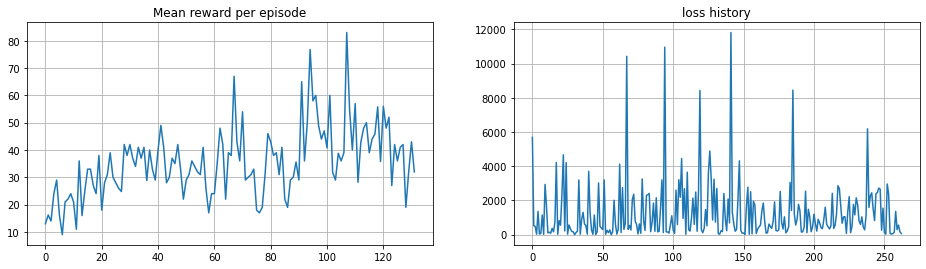

 45%|█████████████████████████████████                                        | 9828/21699 [3:36:18<4:21:16,  1.32s/it]


KeyboardInterrupt: 

In [5]:
train(agent, test_env, env, map_name, n_steps, max_n_steps, steps_count, loss_freq, step, mean_rw_history, loss_history)

In [6]:
test_env.close()
env.close()